Reading data
---

Load the mat datas, turn them into png files

record the file name and labels into a csv file


In [197]:
import glob
from scipy.io import loadmat
import cv2
import scipy.io as scio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [198]:
mat_data_path = 'data/small_data'
# mat_data_path = 'data/tiny_data'

#mat_label_path = 'data/small_data'
image_data_path = '/home/jupyter/data/small_image'
#image_label_path = 'data/small_image'
min_phi = 0
max_phi = 360
min_eta = -10
max_eta = 10
min_delta = -10
max_delta = 10

mininum_value = 0.77
maximum_value = 1.0

In [199]:
#list data and labels
fileList = glob.glob(os.path.join(mat_data_path, 'data*.mat'))
# labelList = glob.glob(os.path.join(mat_data_path, 'labels*.mat'))

In [200]:
# Matrix to image, have to multiple by 255
def MatrixToImage(data):
    # data = (data - mininum_value) / (maximum_value - mininum_value)
    data = (data - np.amin(data)) / (np.amax(data) - np.amin(data))
    data = data*255
    new_im = Image.fromarray(data.astype(np.uint8))
    return new_im

# Turn 3d label of angles to 1-d label ------ maybe not
def toLabel(angles):
    label = (round(angles[0]) - min_phi)*(max_eta - min_eta)*(max_delta - min_delta) + (round(angles[1]) - min_eta)*(max_eta - min_eta) + round(angles[2]) - min_delta
    return int(label)

# turn float to int
def toIntLabel(angles):
    angles[0] = (angles[0] - min_phi)/(max_phi - min_phi)
    angles[1] = (angles[1] - min_eta)/(max_eta - min_eta)
    angles[2] = (angles[2] - min_delta)/(max_delta - min_delta)
    
    # return angles.round().astype(int)
    return angles[0], angles[1], angles[2]

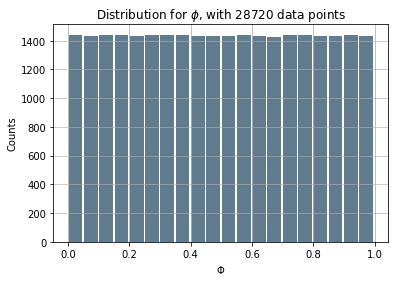

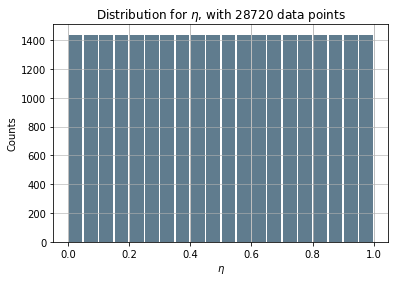

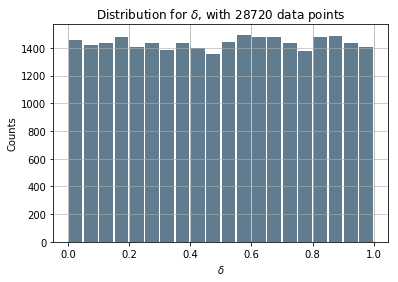

,images,phi,eta,delta
0,/home/jupyter/data/small_image/data_2402733.png,0.835859,0.339615,0.304345
1,/home/jupyter/data/small_image/data_2600733.png,0.904562,0.099381,0.621724
2,/home/jupyter/data/small_image/data_2317333.png,0.805483,0.654867,0.152955
3,/home/jupyter/data/small_image/data_2217533.png,0.769877,0.182644,0.448377
4,/home/jupyter/data/small_image/data_2429633.png,0.843641,0.731735,0.643688


In [201]:
labels = []
info_list = []
for each_mat_file in fileList:
    # print(each_file)
    file_name = os.path.basename(each_mat_file)
    label_file = each_mat_file.replace('data_', 'labels_')
    image_path = os.path.join(image_data_path, file_name.split('.')[0] + '.png')
    # print(file_name, label_file)
    
    array_struct = loadmat(each_mat_file)
    label_struct = loadmat(label_file)
    # print(array_struct)
        
    array_data = array_struct['image']
    label_data = label_struct['lab'][0]
    lables = labels.append(label_data)
    # print('minx is ', np.amin(array_data), ', max is ', np.amax(array_data))
    # print(array_data)
    # print(label_data)
    
    phi, eta, delta = toIntLabel(label_data)
    # print('label is', label)
    
    info_list.append([image_path, phi, eta, delta])
    
    image = MatrixToImage(array_data)
    image.save(image_path)
    
images_and_labels = pd.DataFrame(info_list, columns=['images', 'phi', 'eta', 'delta'])
    
labels = np.array(labels)

phi = pd.Series(labels[:,0])
fig = phi.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e').get_figure()
plt.title('Distribution for $\phi$, with ' + str(labels[:,0].shape[0]) + ' data points')
plt.xlabel('$\Phi$')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
fig.savefig('figures/phi.png')
plt.show()

eta = pd.Series(labels[:,1])
fig =  eta.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e').get_figure()
plt.title('Distribution for $\eta$, with ' + str(labels[:,0].shape[0]) + ' data points')
plt.xlabel('$\eta$')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
fig.savefig('figures/eta.png')
plt.show()

delta = pd.Series(labels[:,2])
fig = delta.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e').get_figure()
plt.title('Distribution for $\delta$, with ' + str(labels[:,0].shape[0]) + ' data points')
plt.xlabel('$\delta$')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
fig.savefig('figures/delta.png')
plt.show()

images_and_labels.head()

In [202]:
images_and_labels.to_csv('data_and_labels.csv', index=False)